In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


### Spliting dataset into train and validate(test)

In [7]:
img_height = 256
img_width = 256
batch_size = 10

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Data Augmentation

In [25]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal",
                       input_shape=(img_height,
                                    img_width,
                                    3)),
     layers.RandomRotation(0.3),
     layers.RandomZoom(0.2),
    ]
)

### Create CNN Model

In [32]:
num_classes = 5

model = Sequential([
                    data_augmentation,
                    layers.Rescaling(1./255),
                    layers.Conv2D(16,3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3, padding="same", activation="relu"),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation="relu"),
                    layers.Dense(num_classes)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [27]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [28]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
294/294 [==============================] - 229s 775ms/step - loss: 1.3234 - accuracy: 0.4544 - val_loss: 1.1120 - val_accuracy: 0.5627
Epoch 2/10
294/294 [==============================] - 229s 778ms/step - loss: 1.0624 - accuracy: 0.5760 - val_loss: 1.0216 - val_accuracy: 0.6035
Epoch 3/10
294/294 [==============================] - 229s 777ms/step - loss: 0.9531 - accuracy: 0.6226 - val_loss: 0.9476 - val_accuracy: 0.6485
Epoch 4/10
294/294 [==============================] - 229s 777ms/step - loss: 0.8811 - accuracy: 0.6563 - val_loss: 0.8427 - val_accuracy: 0.6703
Epoch 5/10
294/294 [==============================] - 229s 777ms/step - loss: 0.8259 - accuracy: 0.6764 - val_loss: 0.8190 - val_accuracy: 0.6730
Epoch 6/10
294/294 [==============================] - 228s 775ms/step - loss: 0.8251 - accuracy: 0.6730 - val_loss: 0.7756 - val_accuracy: 0.6853
Epoch 7/10
294/294 [==============================] - 229s 778ms/step - loss: 0.7825 - accuracy: 0.6894 - val_loss: 0.7375 -

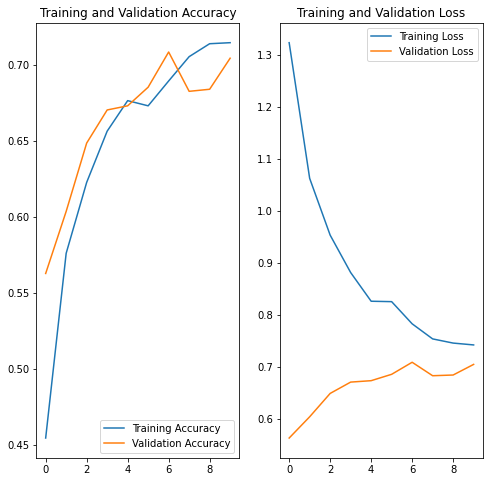

In [29]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_acc, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [31]:
class_names = train_ds.class_names

### Test trained model

In [33]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file("Red_sunflower", origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch

predictions = model.predict(img_array)
score =  tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100*np.max(score))
    )

This image most likely belongs to dandelion with a 23.68 percent confidence.


### Test Images

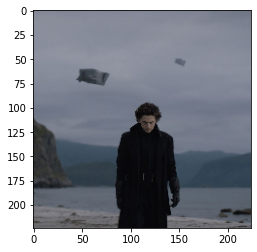

In [46]:
img_path = "example4.jpg"
img = load_img(img_path, target_size=(224,224))
plt.imshow(img)

#### Preprocessing images

In [47]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [41]:
res_model = ResNet50(weights="imagenet")
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [48]:
preds = res_model.predict(x)
print("predicted: ",decode_predictions(preds, top=3)[0])

predicted:  [('n09399592', 'promontory', 0.41377354), ('n09428293', 'seashore', 0.33802563), ('n02667093', 'abaya', 0.11682789)]


In [ ]:
""